### Part of EECS 6893 - Big Data Analytics - Fall 2021 - Final Project 

* Group ID:- 202112-53
* Title:- Assaying MSD
* Contributors:- Karpagam Murugappan; Arya Kasulla



Code for opening matching track ID and extracting lyrics and storing it to a CSV file

In [1]:
import os
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
plt.rcParams['font.size']=15

In [ ]:
'''
Form words dict as the data from mxm contains lyrics in form of top words indices and their occurences count in that 
particular lyrics
'''

word_dict = {}
with open(os.getcwd()+"/data/mxm_dataset_train.txt") as f:
  ct=0
  for line in f.readlines():
    if line[0]=='%':
      parts = line[1:].split(',')
      indx = 1
      for p in parts:
        word_dict[indx]=p
        indx+=1
      break

In [ ]:
word_dict

{1: 'i',
 2: 'the',
 3: 'you',
 4: 'to',
 5: 'and',
 6: 'a',
 7: 'me',
 8: 'it',
 9: 'not',
 10: 'in',
 11: 'my',
 12: 'is',
 13: 'of',
 14: 'your',
 15: 'that',
 16: 'do',
 17: 'on',
 18: 'are',
 19: 'we',
 20: 'am',
 21: 'will',
 22: 'all',
 23: 'for',
 24: 'no',
 25: 'be',
 26: 'have',
 27: 'love',
 28: 'so',
 29: 'know',
 30: 'this',
 31: 'but',
 32: 'with',
 33: 'what',
 34: 'just',
 35: 'when',
 36: 'like',
 37: 'now',
 38: 'que',
 39: 'time',
 40: 'can',
 41: 'come',
 42: 'de',
 43: 'there',
 44: 'go',
 45: 'up',
 46: 'oh',
 47: 'la',
 48: 'one',
 49: 'they',
 50: 'out',
 51: 'down',
 52: 'get',
 53: 'she',
 54: 'was',
 55: 'see',
 56: 'if',
 57: 'got',
 58: 'never',
 59: 'from',
 60: 'he',
 61: 'feel',
 62: 'want',
 63: 'let',
 64: 'make',
 65: 'way',
 66: 'say',
 67: 'take',
 68: 'would',
 69: 'as',
 70: 'ca',
 71: 'day',
 72: 'at',
 73: 'babi',
 74: 'away',
 75: 'life',
 76: 'yeah',
 77: 'y',
 78: 'back',
 79: 'by',
 80: 'her',
 81: 'heart',
 82: 'here',
 83: 'how',
 84: 'cou

In [ ]:
track_ids_list=[]
lyrics_list=[]

In [ ]:
with open(os.getcwd()+"/data/mxm_dataset_train.txt") as f:
  ct=0
  for line in f.readlines():
    if line[0]=='#' or line[0]=='%':
      continue
    ct+=1
    lyrics = ''
    track_id = line.split(',')[0]
    track_ids_list.append(track_id)
    parts = line.split(',')[2:]
    for p in parts:
      word_idx = p.split(':')[0]
      word_ct = int(p.split(':')[1])
      for _ in range(word_ct):
        lyrics+=word_dict[int(word_idx)]
        lyrics+=' '
    
    lyrics_list.append(lyrics)


lyrics_df = pd.DataFrame()
lyrics_df['TRACK_ID'] = track_ids_list
lyrics_df['LYRICS'] = lyrics_list
lyrics_df.to_csv(os.getcwd()+"/data/track_lyrics.csv",index=False)

In [ ]:
lyrics_df.columns

Index(['TRACK_ID', 'LYRICS'], dtype='object')

In [ ]:
'''
Map track ID to lyrics
'''
years = []
ids_list=[]
ly_list=[]
main_df = pd.read_csv(os.getcwd()+"/data/SOURCE-DATASET-1.csv")
for i,r in main_df.iterrows():
    chk_var = r['SONG_ID'][2:-1]
    pdf = lyrics_df.loc[lyrics_df['TRACK_ID']==chk_var]
    if len(pdf)!=0:
      #Only for entries found
      years.append(pdf.iloc[0]['YEAR'])
      ids_list.append(pdf.iloc[0]['TRACK_ID'])
      ly_list.append(pdf.iloc[0]['LYRICS'])
lyrics_df_new = pd.DataFrame()
lyrics_df_new['TRACK_ID'] = ids_list
lyrics_df_new['LYRICS'] = ly_list
lyrics_df_new['YEAR'] = years
lyrics_df_new.to_csv(os.getcwd()+"/data/track_lyrics_1.csv",index=False)

In [12]:
train = pd.read_csv(os.getcwd()+"/data/track_lyrics_1.csv")

# Create ground truht column using textblob polarity value
train['GROUND_TRUTH'] = train['LYRICS'].apply(lambda x: TextBlob(str(x)).sentiment[0])

In [13]:
#Plot the sentiments count as bar graph year wise
year_sent_dict={}
for year in train['YEAR'].unique().tolist():
  if year!=0:
    yeardf = train.loc[train['YEAR']==year]
    sent_col = []
    for i,r in yeardf.iterrows():
      if r['GROUND_TRUTH'] == 0:
        sent_col.append(2)
      elif r['GROUND_TRUTH'] < 0:
        sent_col.append(1)
      else:
        sent_col.append(3)

      dict_d={}
      dict_d['neg'] = sent_col.count(1)
      dict_d['neu'] = sent_col.count(2)
      dict_d['pos'] = sent_col.count(3)

      year_sent_dict[year] = dict_d


In [14]:
year_sent_dict

{1959: {'neg': 0, 'neu': 1, 'pos': 1},
 1960: {'neg': 0, 'neu': 0, 'pos': 3},
 1962: {'neg': 1, 'neu': 0, 'pos': 1},
 1963: {'neg': 1, 'neu': 0, 'pos': 3},
 1964: {'neg': 0, 'neu': 0, 'pos': 2},
 1965: {'neg': 0, 'neu': 0, 'pos': 1},
 1966: {'neg': 1, 'neu': 1, 'pos': 0},
 1967: {'neg': 3, 'neu': 0, 'pos': 5},
 1968: {'neg': 1, 'neu': 1, 'pos': 0},
 1969: {'neg': 2, 'neu': 2, 'pos': 0},
 1970: {'neg': 2, 'neu': 0, 'pos': 3},
 1971: {'neg': 5, 'neu': 2, 'pos': 4},
 1972: {'neg': 3, 'neu': 3, 'pos': 3},
 1973: {'neg': 1, 'neu': 1, 'pos': 2},
 1974: {'neg': 1, 'neu': 1, 'pos': 4},
 1975: {'neg': 3, 'neu': 0, 'pos': 5},
 1976: {'neg': 3, 'neu': 0, 'pos': 1},
 1977: {'neg': 1, 'neu': 1, 'pos': 5},
 1978: {'neg': 2, 'neu': 0, 'pos': 4},
 1979: {'neg': 2, 'neu': 4, 'pos': 9},
 1980: {'neg': 4, 'neu': 0, 'pos': 4},
 1981: {'neg': 4, 'neu': 1, 'pos': 5},
 1982: {'neg': 8, 'neu': 3, 'pos': 9},
 1983: {'neg': 4, 'neu': 3, 'pos': 6},
 1984: {'neg': 5, 'neu': 2, 'pos': 5},
 1985: {'neg': 3, 'neu': 

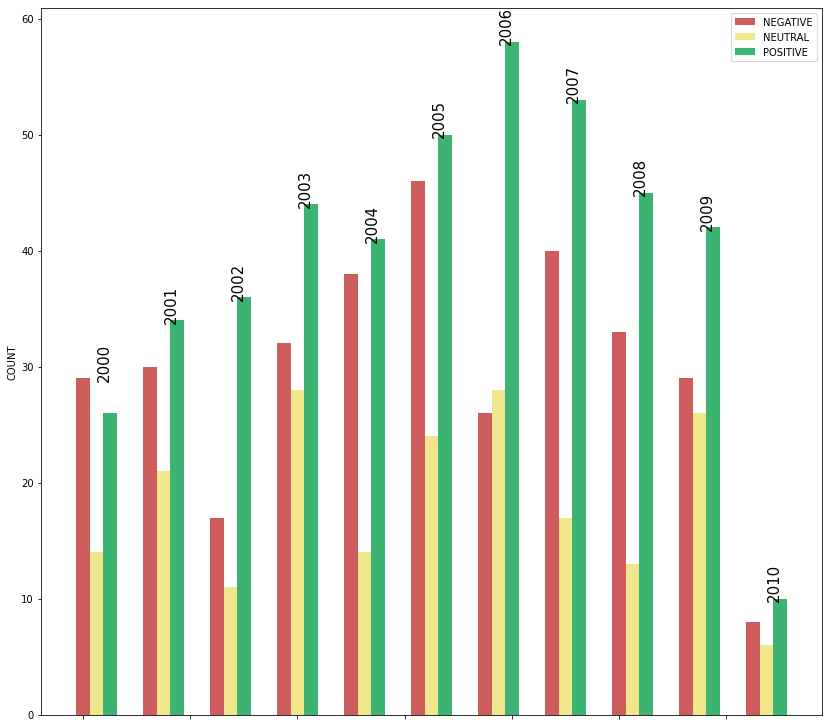

In [15]:
plt.figure(figsize=(14,13))
pos = 0
w = 0.25
oldx=[]
newx=[]
i = 0
for k in sorted(list(year_sent_dict.keys())):
  if k < 2000 or k > 2010:
    continue
  max_ct = max(year_sent_dict[k]['neg'],year_sent_dict[k]['neu'],year_sent_dict[k]['pos'])
  if i == 0:
    plt.bar(pos,year_sent_dict[k]['neg'],width=w,label='NEGATIVE',color='indianred')
    plt.bar(pos+w,year_sent_dict[k]['neu'],width=w,label='NEUTRAL',color='khaki')
    plt.bar(pos+w+w, year_sent_dict[k]['pos'],width=w,label='POSITIVE',color='mediumseagreen')
  else:
    plt.bar(pos,year_sent_dict[k]['neg'],width=w,color='indianred')
    plt.bar(pos+w,year_sent_dict[k]['neu'],width=w,color='khaki')
    plt.bar(pos+w+w, year_sent_dict[k]['pos'],width=w,color='mediumseagreen')

  plt.text(pos+w, max_ct,str(k),rotation=90,fontsize = 15)

  pos+= (w+w+w+0.5)
  i+=1
plt.legend()
plt.xticks(visible=False)
plt.ylabel("COUNT")
plt.show()